### Table of Contents

1. Load data
2. Exploratory Data Analysis
3. Visualization

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
calls = pd.read_csv('/users/johnstonkirimo/projects/weekly_analysis/Week2/data/311-service-requests.csv', low_memory = True)
calls.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [4]:
calls.shape

(111069, 52)

In [11]:
#check date range

calls.groupby('Created Date').size()

Created Date
10/04/2013 01:00:00 PM    3
10/04/2013 01:00:50 AM    1
10/04/2013 01:00:51 PM    1
10/04/2013 01:00:54 PM    1
10/04/2013 01:00:58 PM    1
                         ..
10/31/2013 12:43:47 AM    1
10/31/2013 12:46:27 AM    1
10/31/2013 12:51:00 AM    1
10/31/2013 12:52:46 AM    1
10/31/2013 12:54:03 AM    1
Length: 57872, dtype: int64

In [15]:
#Check data types of each column

calls.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [6]:
#What are the types of complaints made?

calls[['Complaint Type','Descriptor']]

,Complaint Type,Descriptor
0,Noise - Street/Sidewalk,Loud Talking
1,Illegal Parking,Commercial Overnight Parking
2,Noise - Commercial,Loud Music/Party
3,Noise - Vehicle,Car/Truck Horn
4,Rodent,Condition Attracting Rodents
...,...,...
111064,Maintenance or Facility,Structure - Outdoors
111065,Illegal Parking,Posted Parking Sign Violation
111066,Noise - Street/Sidewalk,Loud Talking
111067,Noise - Commercial,Loud Talking


In [7]:
#Where are the calls coming from?

calls[['Complaint Type','Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


In [8]:
#overview of the dataset

calls.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Columns: 52 entries, Unique Key to Location
dtypes: float64(5), int64(1), object(46)
memory usage: 44.1+ MB


In [9]:
#Get the number(volume) of calls by the call type and town(Borough)

calls_type_city = calls.groupby(['Complaint Type', 'Borough']).size().reset_index(name='Volume')
calls_type_city

,Complaint Type,Borough,Volume
0,APPLIANCE,BRONX,108
1,APPLIANCE,BROOKLYN,175
2,APPLIANCE,MANHATTAN,89
3,APPLIANCE,QUEENS,67
4,APPLIANCE,STATEN ISLAND,6
...,...,...,...
633,Water System,STATEN ISLAND,326
634,Water System,Unspecified,2
635,Window Guard,BROOKLYN,1
636,Window Guard,MANHATTAN,1


In [10]:
#Get calls per town

calls_by_borough = calls.groupby(['Borough']).size().reset_index(name='Volume')
calls_by_borough

,Borough,Volume
0,BRONX,19686
1,BROOKLYN,32890
2,MANHATTAN,24288
3,QUEENS,22281
4,STATEN ISLAND,4817
5,Unspecified,7107


In [44]:
#Most common complaint type?

calls['Complaint Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Ferry Permit                          1
Stalled Sites                         1
Open Flame Permit                     1
DHS Income Savings Requirement        1
Trans Fat                             1
Name: Complaint Type, Length: 165, dtype: int64

In [61]:
#What are the top 10 complaint types?

popular_calls = calls['Complaint Type'].value_counts()
popular_calls[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

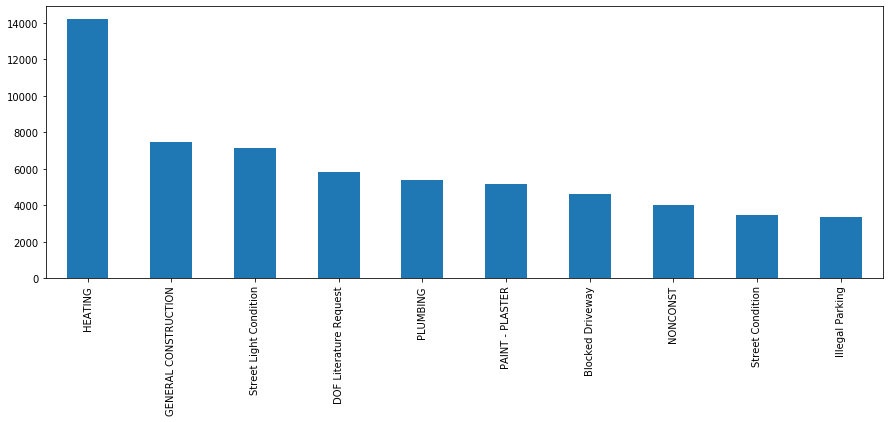

In [60]:
#Plotting the most popular calls 

popular_calls[:10].plot(kind='bar')

In [54]:
#Calls made to the agency 

calls_by_agency = calls.groupby(['Agency Name']).size().reset_index(name='Total Calls')
calls_by_agency

,Agency Name,Total Calls
0,3-1-1 Call Center,32
1,311 Executive Office - EC,60
2,A - Bronx,201
3,A - Brooklyn,496
4,A - Canine Task Force Citywide,144
...,...,...
130,School - The Mott Hall School,1
131,School - The Richard H Hungerford School,1
132,School - The River School,1
133,Senior Citizen Rent Increase Exemption Unit,530


In [55]:
#top 5 Calls received by Agency

topFiveCalls = calls['Agency Name'].value_counts()
topFiveCalls[:5]

Department of Housing Preservation and Development    39067
Department of Transportation                          17706
New York City Police Department                       15295
Department of Environmental Protection                 8896
Department of Finance                                  5795
Name: Agency Name, dtype: int64

In [16]:
#top 5 Calls received by Agency -- by percentage

topFiveCalls = calls['Agency Name'].value_counts(normalize=True)
topFiveCalls[:5]

Department of Housing Preservation and Development    0.351736
Department of Transportation                          0.159414
New York City Police Department                       0.137707
Department of Environmental Protection                0.080094
Department of Finance                                 0.052175
Name: Agency Name, dtype: float64

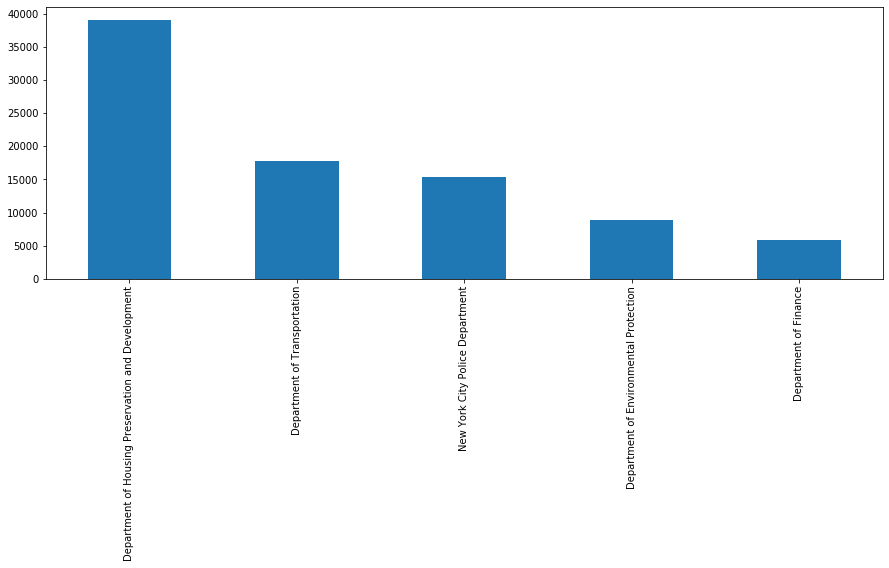

In [63]:
#Plotting the most popular agencies 

topFiveCalls[:5].plot(kind='bar')